# Problemas 12-108 12-109 12-113

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import itertools
%matplotlib inline

In [2]:
df = pd.read_excel('table 12-14.xlsx')
df.head()

,Obs,y,x1,x2,x3,x4,x5,x6
0,1,4540,2140,20640,30250,205,1732,99
1,2,4315,2016,20280,30010,195,1697,100
2,3,4095,1905,19860,29780,184,1662,97
3,4,3650,1675,18980,29330,164,1598,97
4,5,3200,1474,18100,28960,144,1541,97


In [3]:
modelo = smf.ols('y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df)
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2350.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           6.07e-42
Time:                        10:27:32   Log-Likelihood:                -184.01
No. Observations:                  40   AIC:                             382.0
Df Residuals:                      33   BIC:                             393.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4738.0149   2444.740     -1.938      0.061   -9711.877     235.847
x1             1.1185      0.286      3.904      0.000       0.536       1.701
x2            -0.0302      0.038     -0.789      0.435      -0.108       0.048
x3             0.2306      0.118      1.954      0.059      -0.010       0.471
x4             3.8495      2.686      1.433      0.161      -1.616       9.315
x5             0.8219      0.351      2.343      0.025       0.108       1.535
x6           -16.9465      2.620     -6.468      0.000     -22.277     -11.616
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.855
Skew:                           0.174   Prob(JB):                        0.652
Kurtosis:                       2.374   Cond. No.                     2.07e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

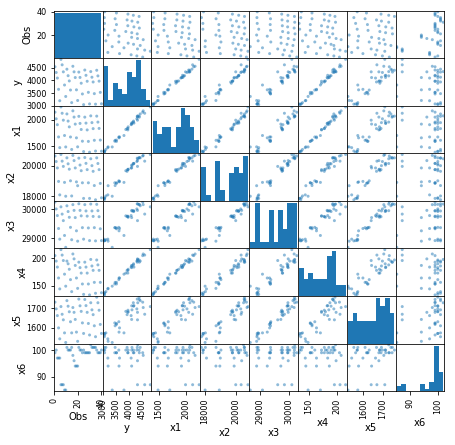

In [4]:
pd.plotting.scatter_matrix(df, figsize=(7, 7));

In [5]:
all_vars = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6']
modelos = []
for k in range(1, len(all_vars)+1):
    subconjuntos = itertools.combinations(all_vars, k)
    for sc in subconjuntos:
        formula = 'y ~ ' + ' + '.join(list(sc))
        resultado = smf.ols(formula, data=df).fit()
        modelos.append({'k': k,
                        'R2adj': resultado.rsquared_adj,
                        'Formula': formula})
df_mdls = pd.DataFrame(modelos)
df_mdls.sort_values(['R2adj'], ascending=False)

,Formula,R2adj,k
60,y ~ x1 + x3 + x4 + x5 + x6,0.997271,5
62,y ~ x1 + x2 + x3 + x4 + x5 + x6,0.997241,6
49,y ~ x1 + x3 + x5 + x6,0.997196,4
58,y ~ x1 + x2 + x3 + x5 + x6,0.997155,5
50,y ~ x1 + x4 + x5 + x6,0.997094,4
59,y ~ x1 + x2 + x4 + x5 + x6,0.997012,5
27,y ~ x1 + x3 + x6,0.996967,3
30,y ~ x1 + x5 + x6,0.996941,3
43,y ~ x1 + x2 + x3 + x6,0.996938,4
48,y ~ x1 + x3 + x4 + x6,0.996902,4


In [6]:
resultado = smf.ols('y ~ x4', data=df).fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     3859.
Date:                Tue, 14 Nov 2017   Prob (F-statistic):           8.01e-40
Time:                        10:27:37   Log-Likelihood:                -212.60
No. Observations:                  40   AIC:                             429.2
Df Residuals:                      38   BIC:                             432.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.9901     60.718      2.717      0.010      42.072     287.908
x4            21.4270      0.345     62.119      0.000      20.729      22.125
==============================================================================
Omnibus:                        3.260   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                2.938
Skew:                           0.651   Prob(JB):                        0.230
Kurtosis:                       2.742   Cond. No.                     1.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

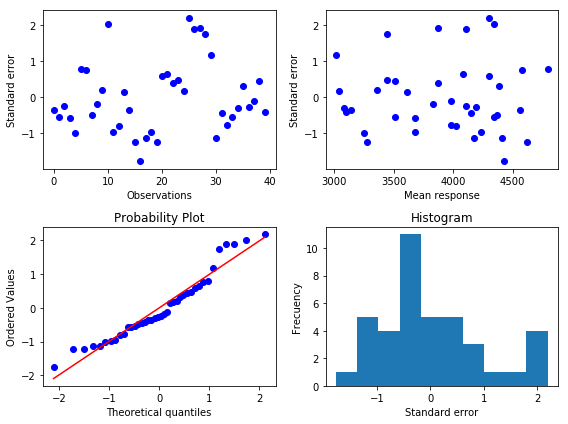

In [7]:
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(221)
ax.scatter(df.index, resultado.resid_pearson, color='blue')
ax.set_xlabel('Observations')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(222)
ax.scatter(resultado.fittedvalues, resultado.resid_pearson, color='blue')
ax.set_xlabel('Mean response')
ax.set_ylabel('Standard error')

ax = fig.add_subplot(223)
st.probplot(resultado.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(resultado.resid_pearson)
ax.set_xlabel('Standard error')
ax.set_ylabel('Frecuency')
ax.set_title('Histogram')

plt.tight_layout()